In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline

In [5]:
cal_dir = './camera_cal/'
cal_files = os.listdir(cal_dir)

(720, 1280)


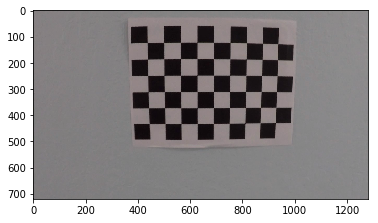

In [30]:
img = cv2.imread(cal_dir+cal_files[9])
img_shape = img.shape[:2]
plt.imshow(img)
print(img_shape)

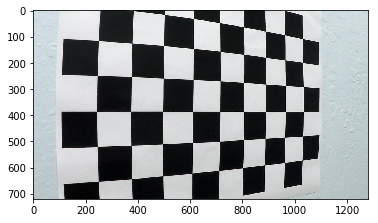

In [18]:
plt.imshow(img)

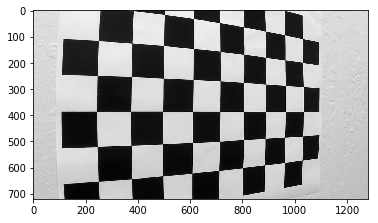

In [19]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

In [20]:
nx = 9
ny = 6
objpoints = []
imgpoints = []

#undistorted chessboard coordinates
objp = np.zeros((nx*ny,3), np.float32)
objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2)

def findchess(image_file_list, nx=9, ny=6, image_dir=None):
    """
    get corners using calibration images
    fills the objpoints and imgpoints lists
    """
    global objpoints, imgpoints
    for image_file in image_file_list:
        image = cv2.imread(image_dir+image_file)
        image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
        ret, corners = cv2.findChessboardCorners(image, (nx, ny), None)                               
    
        #if able to find corders, append to objpoints and imgpoints
        if ret == True:
            imgpoints.append(corners)
            objpoints.append(objp)



In [21]:
findchess(cal_files,image_dir=cal_dir)

In [22]:
#calibrate camera
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_shape, None, None)

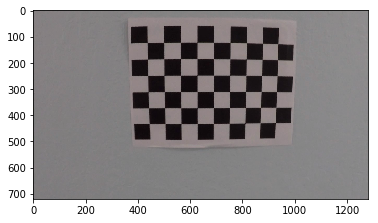

In [31]:
plt.imshow(img)

In [32]:
dst = cv2.undistort(img, mtx, dist, None, mtx)

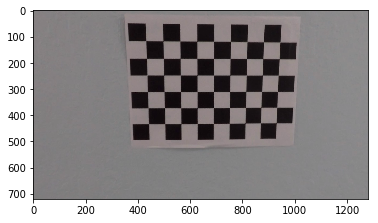

In [33]:
plt.imshow(dst)

In [88]:
################### Line Detection ###################
thresh_min = 20
thresh_max = 100
def sobel(img_path, thresh_min, thresh_max, orient='x'):
    """
    get sobel
    orient either x or y
    """
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    if orient == 'x':
        sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 1,0))
    if orient == 'y':
        sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 0,1))
    #convert to 8-bit integer
    scaled_sobel = np.uint8(255*sobel/np.max(sobel))
    
    binary_output = np.zeros_like(scaled_sobel)
    binary_output[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1
    
    return binary_output
#gray = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
#sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
#sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
#abs_sobelx = np.absolute(sobelx)  #get absolute value of x
#scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))  #convert to absolute value


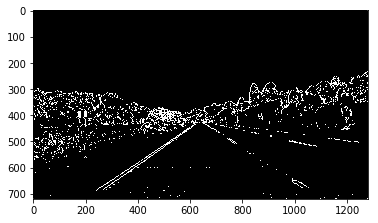

In [93]:
path = './test_images/straight_lines1.jpg'
sobeled = sobel(path, min_thresh, max_thresh, orient='x')
plt.imshow(sobeled, cmap='gray')

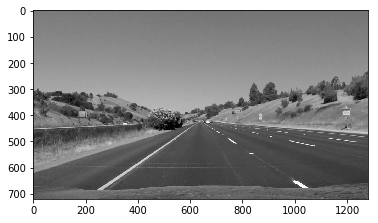

In [83]:
a = './test_images/straight_lines1.jpg'
min_thresh = 20
max_thresh = 255
a = cv2.imread(a)
a = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
sobelx = cv2.Sobel(a, cv2.CV_64F, 1,0)
abs_sobelx = np.absolute(sobelx)
scaled_sobel = np.uint8(255*abs_sobelx/np.max(sobelx))

binary_output = np.zeros_like(scaled_sobel)
binary_output[(scaled_sobel >= min_thresh) & (scaled_sobel <= max_thresh)] = 1
plt.imshow(a, cmap='gray')

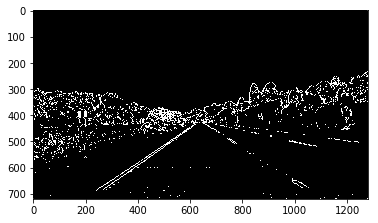

In [84]:
plt.imshow(binary_output, cmap='gray')